In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from growth.sweep.sweep import Sweep

In [3]:
ls ../simulations/

Sweep_181121_235632/


In [4]:
path = '../simulations/Sweep_181121_235632/'
sweep = Sweep.load(path)

In [5]:
import matplotlib.pyplot as plt

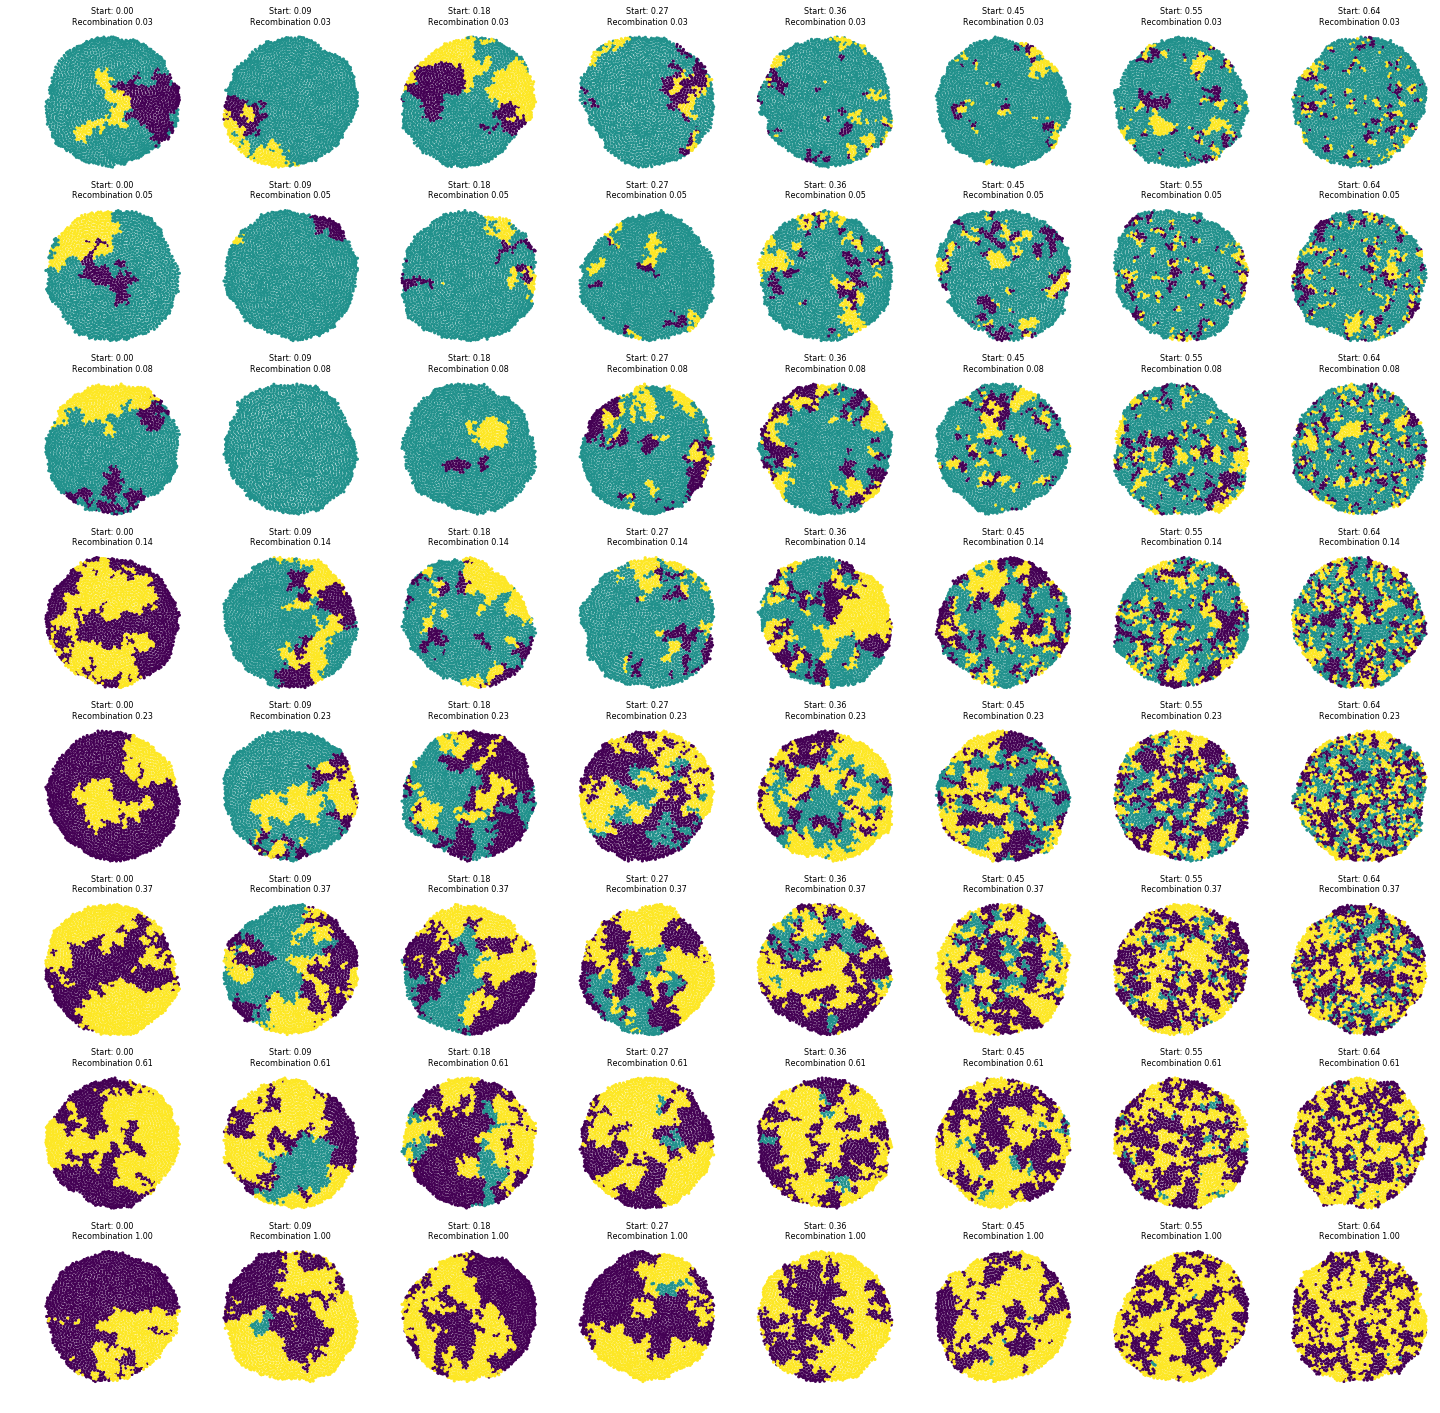

In [6]:
replicate_id = 0

row_size = sweep.density * sweep.batch_size
col_size = sweep.batch_size

fig, axes = plt.subplots(nrows=sweep.density, ncols=sweep.density, figsize=(25, 25))

ax_id = 0
for index in range(sweep.N):
    if (index % sweep.batch_size) != replicate_id:
        continue
    
    # load simulation
    sim = sweep[index]

    # plot culture
    ax = axes.flatten()[ax_id]
    sim.plot(ax=ax, s=10)

    start_point = sim.recombination_start / sim.final_population
    ax.set_title('Start: {:0.2f}\nRecombination {:0.2f}'.format(start_point, sim.recombination), fontsize=8)
    ax.axis('off')

    # increment ax_id
    ax_id += 1

In [7]:
sweep.aggregate()

/Users/Sebi/.virtualenvs/growth/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Sebi/.virtualenvs/growth/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Sebi/.virtualenvs/growth/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Sebi/.virtualenvs/growth/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Sebi/.virtualenvs/growth/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
from growth.cells.cultures import Culture, Cell

In [8]:
sweep.aggregate()

/Users/Sebi/.virtualenvs/growth/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Sebi/.virtualenvs/growth/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Sebi/.virtualenvs/growth/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Sebi/.virtualenvs/growth/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Sebi/.virtualenvs/growth/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
index = 20
replicate_id = 0
sim = sweep[index*sweep.batch_size+replicate_id]

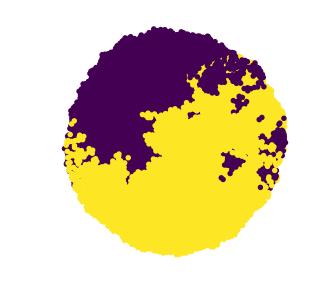

In [10]:
sim.plot()

In [32]:
np.logspace(-5, 0, num=5, base=2)

array([0.03125   , 0.07432544, 0.1767767 , 0.42044821, 1.        ])

In [24]:
sweep.recombination_start

array([0, 1, 2, 3, 4, 5, 6, 7])

In [19]:
import numpy as np

In [25]:
sweep.results['mean_clone_size'] = sweep.results.population / sweep.results.num_clones
sweep.results['start_time'] = sweep.results.recombination_start
df = sweep.results.groupby(['row', 'column']).agg(lambda x: np.mean(x[x!=np.inf])).reset_index()

In [26]:
shape = (sweep.density, sweep.density)
xx = df.start_time.values.reshape(shape)
yy = df.recombination_rate.values.reshape(shape)
zz_extent = 1-df.percent_heterozygous.values.reshape(shape)
zz_num_clones = df.num_clones.values.reshape(shape)
zz_clone_size = np.log10(df.mean_clone_size.values.reshape(shape))
zz_transclone_edges = df.transclone_edges.values.reshape(shape)
zz_clone_size_variation = df.clone_size_variation.values.reshape(shape)

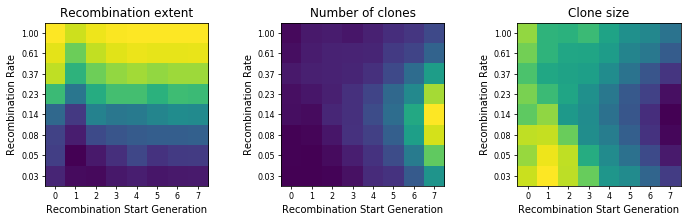

In [32]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 3))
ax0.imshow(zz_extent, cmap=plt.cm.viridis)
ax0.set_title('Recombination extent')
ax1.imshow(zz_num_clones, cmap=plt.cm.viridis)
ax1.set_title('Number of clones')
ax2.imshow(zz_clone_size, cmap=plt.cm.viridis)
ax2.set_title('Clone size')

for ax in (ax0, ax1, ax2):

    _ = ax.set_xticks(np.arange(sweep.density))
    _ = ax.set_yticks(np.arange(sweep.density))
    
    ax.invert_yaxis()
    ax.set_xlabel('Recombination Start Generation')
    ax.set_ylabel('Recombination Rate')
    _ = ax.set_xticklabels(['{:d}'.format(int(l)) for l in xx[0]]+[''], rotation=0)
    _ = ax.set_yticklabels(['{:.2f}'.format(l) for l in yy[:,0]])
    ax.tick_params(labelsize=8, length=3, pad=3)

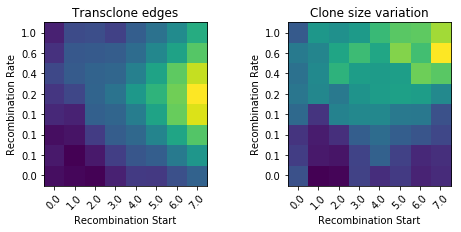

In [34]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))
ax0.imshow(zz_transclone_edges, cmap=plt.cm.viridis)
ax0.set_title('Transclone edges')
ax1.imshow(zz_clone_size_variation, cmap=plt.cm.viridis)
ax1.set_title('Clone size variation')

for ax in (ax0, ax1):
    _ = ax.set_xticks(np.arange(sweep.density))
    _ = ax.set_yticks(np.arange(sweep.density))
    
    ax.invert_yaxis()
    ax.set_xlabel('Recombination Start')
    ax.set_ylabel('Recombination Rate')
    _ = ax.set_xticklabels(['{:0.1f}'.format(l) for l in xx[0]]+[''], rotation=45)
    _ = ax.set_yticklabels(['{:0.1f}'.format(l) for l in yy[:,0]])

In [ ]:
"""
Want to test:
    1. Heterogeneity/Mixing
    2. Fluorescence spectral overlap

METRICS:
    1. mean size of a connected component
    2. number of connected components
    3. % heterogeneous


A: Plot heatmaps of each metric for growth vs recombination rate


"""

In [144]:
import sys
p = '../clones_dev/'
if p not in sys.path:
    sys.path.insert(0, p)

In [145]:
from clones.spatial.graphs import Graph

ModuleNotFoundError: No module named 'infomap'

# Simulation video

In [75]:
%%capture
lineage_video = culture.animate(interval=200, colorby='lineage', cmap=plt.cm.rainbow, repeat_delay=5000)
genotype_video = culture.animate(interval=200, colorby='genotype', cmap=plt.cm.viridis, repeat_delay=5000)

In [76]:
# play video
HTML(genotype_video)

AttributeError: 'Fluorescence' object has no attribute 'support'

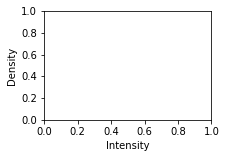

In [161]:
culture.fluorescence.show_pdf()

In [160]:
culture = culture.branch()

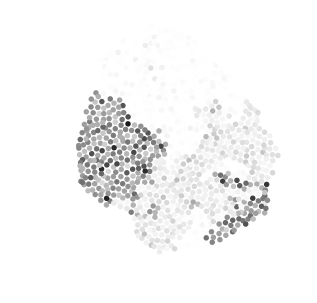

In [31]:
culture.freeze(-1).plot(colorby='phenotype', cmap=plt.cm.Greys)

In [26]:
phylogeny = culture.phylogeny

In [ ]:
# sweep fluorecence functions (can permute with growth)

In [ ]:
colony size

colony heterogeneity (recombination rate)

In [32]:
ls

development.ipynb


In [162]:
import scipy.stats as st

In [191]:
from growth.fluorescence import Fluorescence

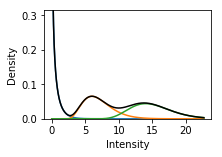

In [211]:
fluor = Fluorescence(shape=(0.5, 5, 10), loc=(0, 2, 5), density=100000)
fluor.show_pdf()

In [64]:
branch = culture.freeze(25)

In [67]:
from ete3 import Tree, TreeStyle

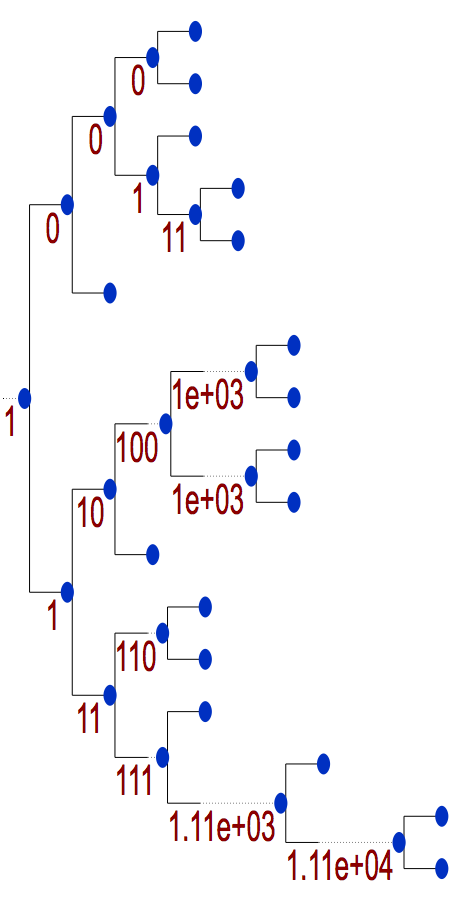

In [84]:
t = Tree(branch.phylogeny.newick)
#t.populate(10, random_branches=True)
ts = TreeStyle()
ts.show_leaf_name = False
ts.scale = 10
ts.show_scale = False
ts.min_leaf_separation = 10
ts.show_branch_support = True

#ts.scale =  10 # 120 pixels per branch length unit
t.render("%%inline", tree_style=ts, h=10, w=5, units='in')

In [141]:
lim = (-1.2, 1.2)

xr = np.linspace(*lim, num=1000)
xx, yy = np.meshgrid(*(xr,)*2)
zz = griddata(pop.xy, pop.genotypes, (xx, yy), method='nearest')
mask = griddata(pop.xy, pop.genotypes, (xx, yy), method='linear')
zz = np.ma.masked_array(zz, mask=np.isnan(mask))

(-1.2, 1.2, -1.2, 1.2)

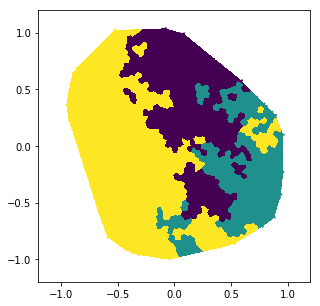

In [142]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(np.flipud(zz), extent=lim+lim)

pop.plot(ax=ax, s=5)
ax2.set_aspect(1)

#ax.contour(zz.data==2, )
ax.axis('on')

In [143]:
from sklearn.neighbors import KernelDensity

In [146]:
kde = KernelDensity().fit(pop.xy)

In [166]:
density = kde.score_samples(np.stack((xx,yy)).T.reshape(-1, 2))

(1000, 1000)

In [ ]:
def _evaluate_max_edge_lengths(self):
    """ Returns max edge length per triangle. """
    merge = lambda x: np.hstack((x, x.sum(axis=1).reshape(-1, 1)))
    dx = np.diff(self.x[self.triangles], axis=1)
    dy = np.diff(self.y[self.triangles], axis=1)
    return np.sqrt((merge(dx)**2) + (merge(dy)**2)).max(axis=1)

In [ ]:
plt.triplot(pop.triangulation, 'bo-', lw=1, markersize=3, alpha=0.1)

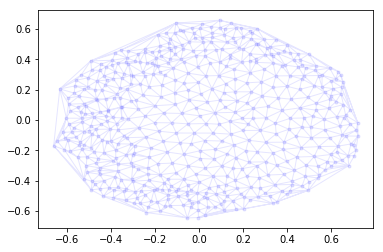

In [13]:
plt.triplot(pop.triangulation, 'bo-', lw=1, markersize=3, alpha=0.1)

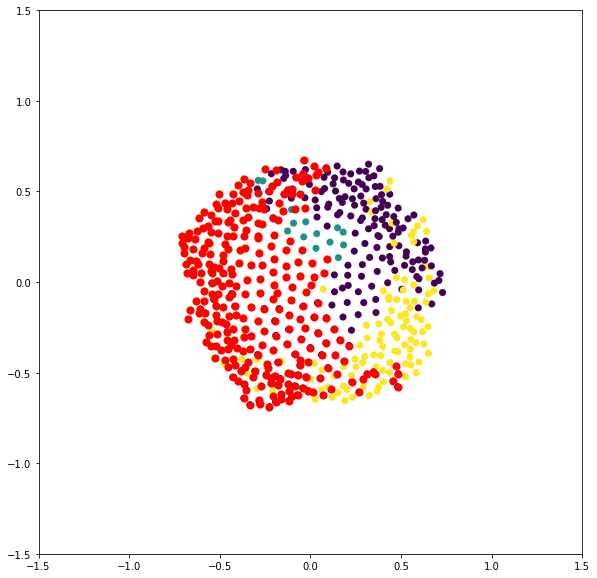

In [178]:
fig, ax = plt.subplots(figsize=(10, 10))
pop.plot(ax)

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)


parent = '0'
descendents = np.array([lineage.startswith(parent) for lineage in pop.lineages])
descendents_xy = pop.xy[descendents]

ax.scatter(*descendents_xy.T, c='r', s=50)

In [111]:
parent = '000'
for child in G.neighbors(parent):
    print(child)

0000
0001


In [112]:
successors = nx.nodes(nx.dfs_tree(G, your_node))

<bound method DiGraph.successors of <networkx.classes.digraph.DiGraph object at 0x112d897f0>>

In [117]:
nx.dfs_tree(G, parent)

In [125]:
parent = '00001'
successors = nx.dfs_successors(G, source=parent)


predecessors = nx.dfs_predecessors(G, parent).keys()

In [133]:
end = list(set(predecessors).difference(set(successors)))

In [134]:
a = '00132213'

In [139]:
a

True

In [ ]:
nx.kamada_kawai_layout

In [352]:
G = nx.DiGraph(dendrogram)

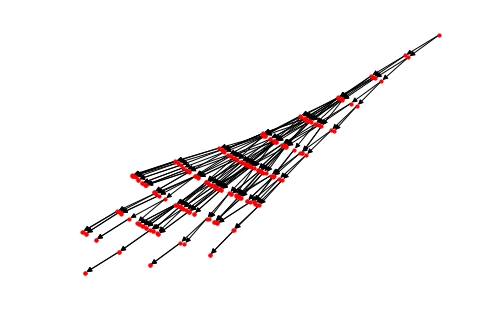

In [361]:
nx.draw_kamada_kawai(G, node_size=10, with_labels=False)